In [1]:
import os, re, math
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

exp_name = 'compare_obs_rew_methods'
checkpoint = '50'
AGENT = 'PPO'
results_list = os.listdir('/headless/ray_results/' + exp_name)

In [22]:
df.custom_metrics.values[0]

"{'cost2_max': -19.570730810146323, 'system_level_velocity_mean': 8.11715377434007, 'outflow_rate_max': 713.8996004134566, 'cost1_min': 21.98702995224827, 'outflow_rate_min': 487.2386111474995, 'cost1_mean': 191.490278965492, 'cost1_max': 230.82242720199895, 'cost2_min': -84.20716196918505, 'system_level_velocity_max': 17.594817257182964, 'outflow_rate_mean': 601.9272690004256, 'system_level_velocity_min': 6.396155097080548, 'cost2_mean': -49.324035230014815}"

In [7]:
results = {}
for result_path in results_list:
    EXP = result_path
    index = [(i.start(), i.end())for i in re.finditer('_', EXP)]
    EXP = EXP[index[1][1]:index[-3][0]]
    result_path = '/headless/ray_results/' + exp_name \
        + '/' + result_path + '/progress.csv'
    df = pandas.read_csv(result_path)
    results[EXP] = {'rew_mean': df.episode_reward_mean.values, 
                   'cost1': df.custom_metrics['cost1_mean'],
                   'cost2': df.custom_metrics['cost2_mean']}

KeyError: 'cost1_mean'

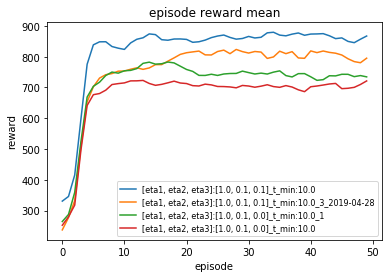

In [3]:
for i, item in enumerate(results.items()):
    key, value = item
    rew = results[key]['rew_mean']
    plt.plot(rew, label=key)
title = "episode reward mean"
plt.xlabel('episode')
plt.ylabel('reward')
plt.title('episode reward mean')
plt.legend(prop={'size':8})

save_dir = '../result/MultiMerge/' + AGENT + '/' + exp_name
save_path = save_dir + '/episode_reward_mean.png'
os.makedirs(save_dir, exist_ok=True)

plt.savefig(save_path)